In [1]:
from electric_meter import *
from IPython.display import HTML

In [9]:
fname='uploads/was-excel.xlsx'
fname='uploads/mine-sep2023.csv'
#fname='uploads/meter_23141644_LP_03-10-2023.csv'
#fname='uploads/meter_23141644_LP_12-11-2023.csv'
#fname='uploads/1694442555_9_5acc46e3.csv'
#fname='uploads/c595_1696146559_9.csv'
#meter = read_data('data/meter-big.csv')
meter = read_data(fname)
#meter = pd.read_excel(fname, skiprows=11)

In [10]:
#meter = read_data('data/meter.csv')

costs, conf = compute_costs(meter)

In [11]:
costs

,no_discount,pazgas_daytime,pazgas_unlimited,pazgas_weekend,pazgas_nighttime,amisragas_unlimited,electra_power,electra_hitec,cellcom_flat,cellcom_home_office,cellcom_nighttime,taoz1,taoz2
timeperiod,,,,,,,,,,,,,
יולי 2023,480.898700,456.274136,456.853765,466.375076,464.283638,449.640284,456.853765,456.181365,456.853765,460.332409,462.779889,831.918762,658.848762
אוגוסט 2023,552.370140,521.796400,524.751633,536.622006,536.885971,516.466081,524.751633,524.282930,524.751633,525.303744,534.015885,934.830385,761.760385
ספטמבר 2023,182.058828,173.793113,172.955886,174.960662,177.254867,170.225004,172.955886,173.802000,172.955886,175.828334,177.381651,452.495363,279.425363


In [12]:
result = style_table(costs)
display(result)

,חחי,פזגז יום,פזגז ללא הגבלה,פזגז סופ״ש,פזגז לילה,אמישראגז,5% אלקטרה פאואר,אלקטרה הייטק,סלקום 5%,סלקום מהבית,סלקום לילה,תעו״ז חד-חודשי,תעו״ז דו-חודשי
תקופה,,,,,,,,,,,,,
יולי 2023,480.90,456.27,456.85,466.38,464.28,449.64,456.85,456.18,456.85,460.33,462.78,831.92,658.85
אוגוסט 2023,552.37,521.80,524.75,536.62,536.89,516.47,524.75,524.28,524.75,525.30,534.02,934.83,761.76
ספטמבר 2023,182.06,173.79,172.96,174.96,177.25,170.23,172.96,173.80,172.96,175.83,177.38,452.50,279.43


In [8]:
if False:
    cols = [costs.columns[i] for i in [0,1,5, 6]]
    display(style_table(costs[cols].copy()))

In [24]:
v = meter.query("timeperiod == '2023095'")

#meter.groupby('month').mean(numeric_only=True).plot()
#meter.groupby('hour').mean(numeric_only=True).plot()

In [41]:
meter

,consumption,date,month,wday,hour,wday_name,timeperiod,season,hhi_weekend
time,,,,,,,,,
2023-08-10 13:00:00,2.043,2023-08-10,8,3,13,Thursday,20230801,summer,False
2023-08-10 14:00:00,2.628,2023-08-10,8,3,14,Thursday,20230801,summer,False
2023-08-10 15:00:00,3.289,2023-08-10,8,3,15,Thursday,20230801,summer,False
2023-08-10 16:00:00,3.444,2023-08-10,8,3,16,Thursday,20230801,summer,False
2023-08-10 17:00:00,3.412,2023-08-10,8,3,17,Thursday,20230801,summer,False
...,...,...,...,...,...,...,...,...,...
2023-09-25 00:00:00,1.167,2023-09-25,9,0,0,Monday,20230901,summer,True
2023-09-25 01:00:00,0.460,2023-09-25,9,0,1,Monday,20230901,summer,True
2023-09-25 02:00:00,0.370,2023-09-25,9,0,2,Monday,20230901,summer,True


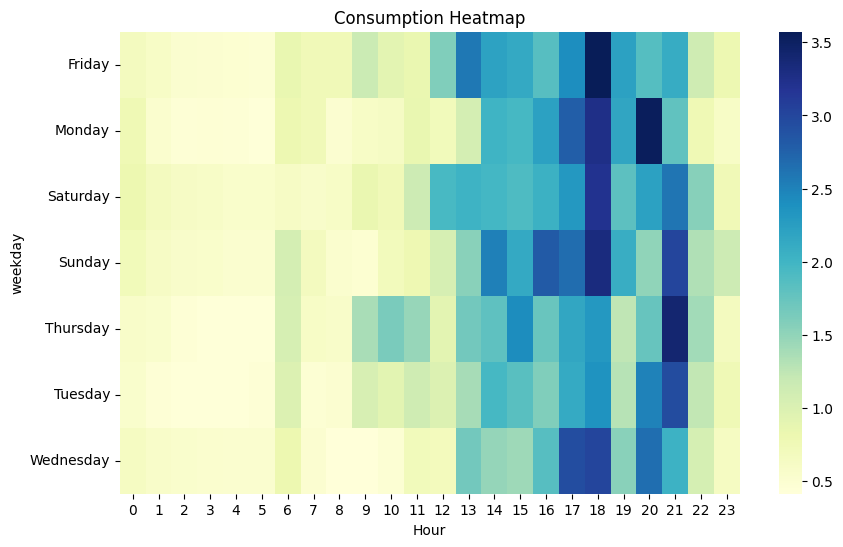

In [47]:
if True:
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Create a pivot table for heatmap
    heatmap_data = meter.query("month == 9").pivot_table(index="wday_name", columns="hour", values="consumption", aggfunc="mean")

    # Create the heatmap using seaborn
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=False, cmap="YlGnBu", fmt="")
    plt.title("Consumption Heatmap")
    plt.xlabel("Hour")
    plt.ylabel("weekday")
    plt.show()
